In [25]:
#(a)
import numpy as np
import scipy.stats as sts
import scipy.special as spc
import matplotlib.pyplot as plt

pts = np.loadtxt('clms.txt')

In [26]:
#calculate and report the mean, median, maximum, minimum, and standard deviation of data
print ('mean =', np.mean(pts))
print ('median =', np.median(pts))
print ('max =', np.max(pts))
print ('min =', np.min(pts))
print ('standard deviation =', np.std(pts))

mean = 720.277975327
median = 172.21
max = 227967.25
min = 0.01
standard deviation = 3972.66375639


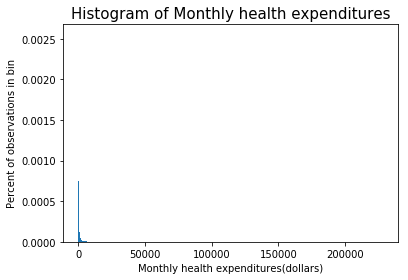

1.0


In [27]:
#plot two histograms
range_pts = max(pts) - min(pts)
weights_1 = (1 / (pts.shape[0]*range_pts/1000))* np.ones_like(pts)
n, bins, patches = plt.hist(pts, 1000, weights=weights_1)
plt.title('Histogram of Monthly health expenditures', fontsize=15)
plt.xlabel(r'Monthly health expenditures(dollars)')
plt.ylabel(r'Percent of observations in bin')
plt.show()
print(n.sum()*range_pts/1000)

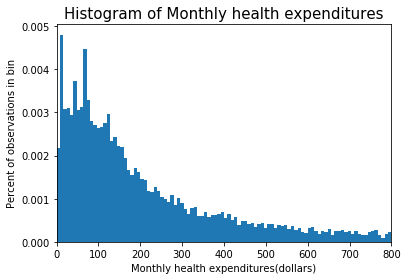

0.849420849421


In [28]:
pts2= pts[pts<=800]
weights_2 = (1 / (pts.shape[0]*8))* np.ones_like(pts2)
n, bins, patches = plt.hist(pts2, 100, weights=weights_2)
plt.title('Histogram of Monthly health expenditures', fontsize=15)
plt.xlabel(r'Monthly health expenditures(dollars)')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 800])
plt.show()
print(n.sum()*8)

In [72]:
#plot two histograms
#I prefer the second histogram
#Because the second one focuses on the main data, capture the feature of data more clearly.

In [29]:
#b.estimate the MLE parameters
def gamma_pdf(xvals, alpha, beta):
    pdf_vals = xvals**(alpha-1)*np.exp(-xvals/beta)/(spc.gamma(alpha)*(beta**alpha))
    return pdf_vals

def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_g(params, args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

import scipy.optimize as opt
beta_g = np.var(pts)/np.mean(pts)  
alpha_g = np.mean(pts)/beta_g 
params_g = np.array([alpha_g, beta_g])
mle_args_g = pts
results_g = opt.minimize(crit_g, params_g, args=(mle_args_g), method = 'L-BFGS-B', bounds=((1e-10, None),(1e-10, None)))
alpha_MLE_g, beta_MLE_g = results_g.x
print('alpha_MLE_g =', alpha_MLE_g, ' beta_MLE_g =', beta_MLE_g)
print('Maximized-log-likelihood-g: ', log_lik_gamma(pts, alpha_MLE_g, beta_MLE_g))

alpha_MLE_g = 0.221755322727  beta_MLE_g = 21911.0646992
Maximized-log-likelihood-g:  -82076.4516057


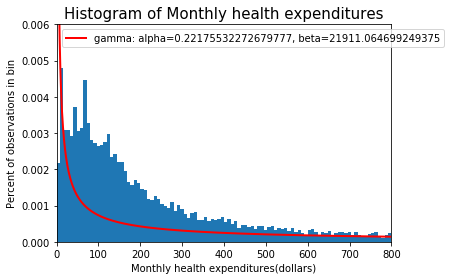

In [14]:
#b. plot the second histogram with the estimate gamma distribution
plt.hist(pts2, 100, weights=weights_2)
plt.title('Histogram of Monthly health expenditures', fontsize=15)
plt.xlabel(r'Monthly health expenditures(dollars)')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 800])
plt.ylim([0,0.006])

dist_pts = np.linspace(1, 800, 1000)
plt.plot(dist_pts, gamma_pdf(dist_pts, alpha_MLE_g, beta_MLE_g),
         linewidth=2, color='r', label='gamma: alpha={}, beta={}'.format(alpha_MLE_g,beta_MLE_g))
plt.legend(loc='upper left')
plt.show()

In [30]:
#c. estimate the MLE parameters
def gene_gamma_pdf(xvals, alpha, beta, m):
    pdf_vals = (m/(beta**alpha))* xvals**(alpha-1)*np.exp(-(xvals/beta)**m)/(spc.gamma(alpha/m))
    return pdf_vals
                                                                          
def log_lik_gene_gamma(xvals, alpha, beta, m):
    pdf_vals = gene_gamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gg(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gene_gamma(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

beta_gg = beta_MLE_g
alpha_gg = alpha_MLE_g
m_gg = 0.99

params_gg = np.array([alpha_gg, beta_gg, m_gg])
mle_args_gg = pts

results_gg = opt.minimize(crit_gg, params_gg, args=(mle_args_gg), method = 'L-BFGS-B', bounds=((1e-10, None), (1e-10, None), (1e-10, None)))
alpha_MLE_gg, beta_MLE_gg, m_MLE_gg = results_gg.x

print('alpha_MLE_gg =', alpha_MLE_gg, ' beta_MLE_gg =', beta_MLE_gg, 'm_MLE_gg =', m_MLE_gg)
print('Maximized-log-likelihood-gg: ', log_lik_gene_gamma(pts, alpha_MLE_gg, beta_MLE_gg, m_MLE_gg))

alpha_MLE_gg = 0.221753918293  beta_MLE_gg = 21911.0646501 m_MLE_gg = 0.997652301706
Maximized-log-likelihood-gg:  -82076.4464883


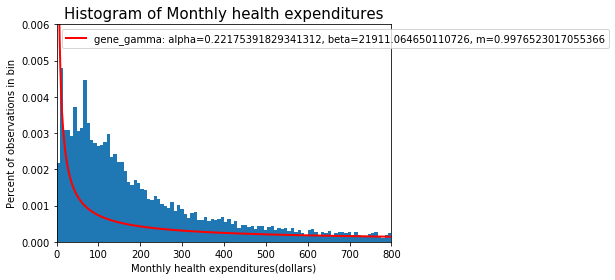

In [31]:
#c. plot the second histogram with the estimate generalized gamma distribution
plt.hist(pts2, 100, weights=weights_2)
plt.title('Histogram of Monthly health expenditures', fontsize=15)
plt.xlabel(r'Monthly health expenditures(dollars)')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 800])
plt.ylim([0,0.006])

dist_pts = np.linspace(1, 800, 1000)
plt.plot(dist_pts, gene_gamma_pdf(dist_pts, alpha_MLE_gg, beta_MLE_gg, m_MLE_gg),
         linewidth=2, color='r', label='gene_gamma: alpha={}, beta={}, m={}'.format(alpha_MLE_gg,beta_MLE_gg, m_MLE_gg))
plt.legend(loc='upper left')
plt.show()

In [32]:
#d. estimate the MLE parameters
def gb2_pdf(xvals, a, b, p, q):
    pdf_vals = a*xvals**(a*p-1)/(b**(a*p)*spc.beta(p, q)*(1+(xvals/b)**a)**(p+q))
    return pdf_vals
                                                                          
def log_lik_gb2(xvals, a, b, p, q):
    pdf_vals = gb2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gb2(params, args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_gb2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

q_gb2 = 10000
a_gb2 = m_MLE_gg
b_gb2 = q_gb2**(1/a_gb2)*beta_MLE_gg
p_gb2 = alpha_MLE_gg/a_gb2
print(a_gb2, b_gb2, p_gb2, q_gb2)

params_gb2 = np.array([a_gb2, b_gb2, p_gb2, q_gb2])
mle_args_gb2 = pts

results_gb2 = opt.minimize(crit_gb2, params_gb2, args=(mle_args_gb2),method = 'L-BFGS-B', bounds=((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None)))
a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2 = results_gb2.x

print('a_MLE_gb2=', a_MLE_gb2, ' b_MLE_gb2=', b_MLE_gb2, 'p_MLE_gb2', p_MLE_gb2,'q_MLE_gb2', q_MLE_gb2)
print('Maximized-log-likelihood(gb2): ', log_lik_gb2(pts, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2))

0.997652301706 223911485.95 0.222275754704 10000
a_MLE_gb2= 0.699138258181  b_MLE_gb2= 223911485.95 p_MLE_gb2 0.99866969466 q_MLE_gb2 9999.1109158
Maximized-log-likelihood(gb2):  -76461.5138836


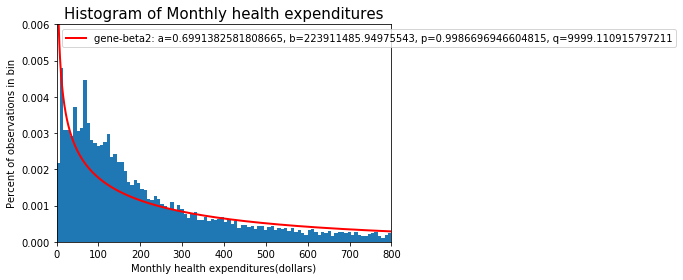

In [33]:
#d. plot the second histogram with the estimate generalized beta2 distribution
plt.hist(pts2, 100, weights=weights_2)
plt.title('Histogram of Monthly health expenditures', fontsize=15)
plt.xlabel(r'Monthly health expenditures(dollars)')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 800])
plt.ylim([0,0.006])

dist_pts = np.linspace(1, 800, 1000)
plt.plot(dist_pts, gb2_pdf(dist_pts, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2),
         linewidth=2, color='r', label='gene-beta2: a={}, b={}, p={}, q={}'.format(a_MLE_gb2,b_MLE_gb2, p_MLE_gb2, q_MLE_gb2))
plt.legend(loc='upper left')
plt.show()

In [34]:
#e.
log_lik_h0 = log_lik_gb2(pts, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2)
log_lik_mle_g = log_lik_gamma(pts, alpha_MLE_g, beta_MLE_g)
LR_val_g = 2 * (log_lik_mle_g - log_lik_h0)
pval_h0_g = 1.0 - sts.chi2.cdf(LR_val_g, 4)
print('chi squared of H0 with 4 degrees of freedom for the estimate GA: ')
print('chi squared value =',LR_val_g )
print('p-value = ', pval_h0_g)

log_lik_h0 = log_lik_gb2(pts,a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2)
log_lik_mle_gg = log_lik_gene_gamma(pts, alpha_MLE_gg, beta_MLE_gg, m_MLE_gg)
LR_val_gg = 2 * (log_lik_mle_gg - log_lik_h0)
pval_h0_gg = 1.0 - sts.chi2.cdf(LR_val_gg, 4)
print('chi squared of H0 with 4 degrees of freedom for the estimate GG: ')
print('chi squared value =',LR_val_gg )
print('p-value = ', pval_h0_gg)

chi squared of H0 with 4 degrees of freedom for the estimate GA: 
chi squared value = -11229.8754442
p-value =  1.0
chi squared of H0 with 4 degrees of freedom for the estimate GG: 
chi squared value = -11229.8652095
p-value =  1.0


In [35]:
#f.
from scipy import integrate
x1 = lambda x: gb2_pdf(x, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2)
prob_gb2 = 1 - integrate.quad(x1, 0, 1000)[0]
print('likelyhood_gb2:', prob_gb2)

x2 = lambda x: gamma_pdf(x, alpha_MLE_g, beta_MLE_g)
prob_g = 1 - integrate.quad(x2, 0, 1000)[0]
print('likelyhood_g:', prob_g)

likelyhood_gb2: 0.16209066282950224
likelyhood_g: 0.45195974447840703
